# Exploring Pythia training dynamics with HMM latent models

## (1) Metrics for Pythia's hidden states directly (Hu et al., 2023)

In [1]:
# Here we collect all the regression tables (name->DataFrame) to summarize in the end.
from collections import defaultdict

regression_tables = defaultdict(list)

### Pythia 70m

In [2]:
import pandas as pd
from training_map import HMMTrainingMapSelection

df_ = pd.read_csv("results/Pythia70m_Hu_metrics.tsv", sep="\t")
TS_70m = HMMTrainingMapSelection(df_)
TS_70m.show_model_selection()

Model is not converging.  Current: -2593.7952225965305 is not greater than -2593.778477134264. Delta is -0.01674546226649909


alt.LayerChart(...)

#### N=4 components

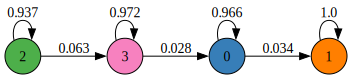

In [3]:
# Select N=4 components from model selection plot above
training_map = TS_70m.get_training_map(4)
training_map.show()

In [4]:
training_map.show_training_states("trace")

alt.FacetChart(...)

##### Train loss

In [5]:
from utils import load_loss

df_loss_70m = load_loss("tmp/train_loss_70m_seed{}.csv", last_steps=False)
training_map.show_training_states("train loss", data=df_loss_70m)

alt.FacetChart(...)

We do linear regression for the bag of states distribution and the final train loss.
Because the train loss is missing for some checkpoints, we correlate with the average over all ckpt >142900.

In [6]:
from utils import regression_table, load_loss

X = training_map.bag_of_states_distributions
y = load_loss("tmp/train_loss_70m_seed{}.csv")

regression_tables["70m/4states/all"].append(regression_table(X, y, color=False))
regression_table(X, y, color=True)

,task,R^2,F-statistic,F-statistic P-value
0,train loss,0.41,0.24,0.87


#### Downstream performance: LAMBADA SWAG PIQA ARC

In [7]:
from utils import regression_table, load_results

X = training_map.bag_of_states_distributions
y = load_results("results/eval-harness/Pythia/downstream_70m_seed{}.json")

regression_tables["70m/4states/all"].append(regression_table(X, y, color=False))
regression_table(X, y, color=True)

,task,metric,R^2,F-statistic,F-statistic P-value
0,arc_challenge,acc,0.96,8.05,0.25
1,arc_easy,acc,0.79,1.29,0.56
2,lambada_openai,acc,0.81,1.44,0.53
3,piqa,acc,0.38,0.20,0.89
4,swag,acc,0.40,0.22,0.88


#### Gender: BLiMP and CrowS-Pairs

In [8]:
from utils import load_results

X = training_map.bag_of_states_distributions
y = load_results("results/eval-harness/Pythia/gender_70m_seed{}.json")

regression_tables["70m/4states/all"].append(regression_table(X, y, color=False))
regression_table(X, y, color=True)

,task,metric,R^2,F-statistic,F-statistic P-value
0,blimp_anaphor_gender_agreement,acc,0.71,0.82,0.65
1,crows_pairs_english,likelihood_diff,0.99,31.90,0.13
2,crows_pairs_english,pct_stereotype,0.37,0.19,0.89
3,crows_pairs_english_gender,likelihood_diff,0.84,1.77,0.49
4,crows_pairs_english_gender,pct_stereotype,1.00,192.61,0.05


#### N=7 components: Detour state
From the model selection plot, N=7 components yields a slightly lower BIC value; but this also results in detour states.

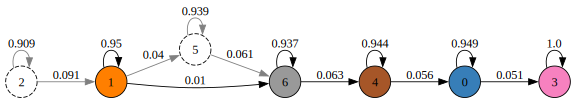

In [9]:
training_map = TS_70m.get_training_map(7)
# Show the graph for seed 4, which does not visit states 2 and 5.
training_map.show(model_seed=4)

In [10]:
training_map.show_training_states("trace")

alt.FacetChart(...)

#### Train loss

In [11]:
training_map.show_training_states("train loss", data=df_loss_70m)

alt.FacetChart(...)

In [12]:
from utils import regression_table, load_loss

X_detour = training_map.detour_states
y = load_loss("tmp/train_loss_70m_seed{}.csv")

regression_tables["70m/7states/detour"].append(regression_table(X_detour, y, color=False))
regression_table(X_detour, y, color=True)

,task,R^2,F-statistic,F-statistic P-value
0,train loss,0.79,5.52,0.10


#### Downstream performance

In [13]:
from utils import regression_table

# Instead of taking the distribution over all states, select discard all non-detour states.
X_detour = training_map.detour_states
y = load_results("results/eval-harness/Pythia/downstream_70m_seed{}.json")

regression_tables["70m/7states/detour"].append(regression_table(X_detour, y, color=False))
regression_table(X_detour, y, color=True)

,task,metric,R^2,F-statistic,F-statistic P-value
0,arc_challenge,acc,0.78,5.40,0.10
1,arc_easy,acc,0.80,5.96,0.09
2,lambada_openai,acc,0.83,7.41,0.07
3,piqa,acc,0.80,6.10,0.09
4,swag,acc,0.80,6.03,0.09


#### Gender

In [14]:
from utils import regression_table

X_detour = training_map.detour_states
y = load_results("results/eval-harness/Pythia/gender_70m_seed{}.json")

regression_tables["70m/7states/detour"].append(regression_table(X_detour, y, color=False))
regression_table(X_detour, y, color=True)

,task,metric,R^2,F-statistic,F-statistic P-value
0,blimp_anaphor_gender_agreement,acc,0.81,6.24,0.09
1,crows_pairs_english,likelihood_diff,0.79,5.50,0.10
2,crows_pairs_english,pct_stereotype,0.81,6.48,0.08
3,crows_pairs_english_gender,likelihood_diff,0.79,5.78,0.09
4,crows_pairs_english_gender,pct_stereotype,0.83,7.09,0.07


### Pythia 160m

In [15]:
import pandas as pd
from training_map import HMMTrainingMapSelection

df_ = pd.read_csv("results/Pythia160m_Hu_metrics.tsv", sep="\t")
TS_160m = HMMTrainingMapSelection(df_)
TS_160m.show_model_selection()

alt.LayerChart(...)

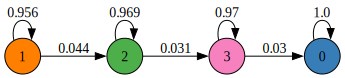

In [16]:
# Select 4 components
training_map = TS_160m.get_training_map(4)
training_map.show()

In [17]:
training_map.show_training_states("trace")

alt.FacetChart(...)

#### Downstream performance

In [18]:
from utils import regression_table

X = training_map.bag_of_states_distributions
y = load_results("results/eval-harness/Pythia/downstream_160m_seed{}.json")

regression_tables["160m/4states/all"].append(regression_table(X, y, color=False))
regression_table(X, y, color=True)

,task,metric,R^2,F-statistic,F-statistic P-value
0,arc_challenge,acc,0.69,0.73,0.67
1,arc_easy,acc,0.23,0.10,0.95
2,lambada_openai,acc,0.65,0.61,0.71
3,piqa,acc,0.82,1.52,0.52
4,swag,acc,0.39,0.22,0.88


#### Gender (Bias)

In [19]:
from utils import regression_table

X = training_map.bag_of_states_distributions
y = load_results("results/eval-harness/Pythia/gender_160m_seed{}.json")

regression_tables["160m/4states/all"].append(regression_table(X, y, color=False))
regression_table(X, y, color=True)

,task,metric,R^2,F-statistic,F-statistic P-value
0,blimp_anaphor_gender_agreement,acc,0.89,2.82,0.41
1,crows_pairs_english,likelihood_diff,0.01,0.00,1.00
2,crows_pairs_english,pct_stereotype,0.67,0.67,0.69
3,crows_pairs_english_gender,likelihood_diff,0.97,11.96,0.21
4,crows_pairs_english_gender,pct_stereotype,0.91,3.29,0.38


#### Detour states

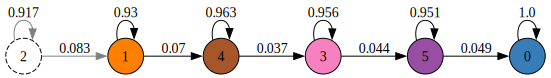

In [20]:
training_map = TS_160m.get_training_map(6)
training_map.show(model_seed=4)

For N=6 components, we only find 1 detour state, which is only visited by seed 0:

In [21]:
training_map.detour_states

array([[0.1038961],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ]])

In [22]:
from utils import regression_table

X_detour = training_map.detour_states
y = load_results("results/eval-harness/Pythia/downstream_160m_seed{}.json")

regression_tables["160m/6states/detour"].append(regression_table(X_detour, y, color=False))
regression_table(X_detour, y, color=True)

,task,metric,R^2,F-statistic,F-statistic P-value
0,arc_challenge,acc,0.20,1.01,0.37
1,arc_easy,acc,0.19,0.95,0.39
2,lambada_openai,acc,0.20,1.00,0.37
3,piqa,acc,0.20,0.99,0.38
4,swag,acc,0.19,0.96,0.38


In [23]:
from utils import regression_table

X_detour = training_map.detour_states
y = load_results("results/eval-harness/Pythia/gender_160m_seed{}.json")

regression_tables["160m/6states/detour"].append(regression_table(X_detour, y, color=False))
regression_table(X_detour, y, color=True)

,task,metric,R^2,F-statistic,F-statistic P-value
0,blimp_anaphor_gender_agreement,acc,0.20,1.00,0.37
1,crows_pairs_english,likelihood_diff,0.20,0.99,0.38
2,crows_pairs_english,pct_stereotype,0.21,1.07,0.36
3,crows_pairs_english_gender,likelihood_diff,0.22,1.10,0.35
4,crows_pairs_english_gender,pct_stereotype,0.22,1.13,0.35


### Summary

In [24]:
from utils import combine_regression_tables

tables = []
names = []

for name, dfs in regression_tables.items():
    names.append(name)
    tables.append(pd.concat(dfs))

combine_regression_tables(tables, names)